In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split


In [2]:
data=pd.read_csv("House_Price.csv")
data

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,NaN,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,41.93,0.573,6.593,69.1,2.64,2.45,2.76,2.06,19.0,9.67,NO,9.348,12.1792,Lake and River,27,YES,0.056006
502,20.6,0.04527,41.93,0.573,6.120,76.7,2.44,2.11,2.46,2.14,19.0,9.08,YES,6.612,13.1648,Lake and River,20,YES,0.059903
503,23.9,0.06076,41.93,0.573,6.976,91.0,2.34,2.06,2.29,1.98,19.0,5.64,NO,5.478,12.1912,NaN,31,YES,0.057572
504,22.0,0.10959,41.93,0.573,6.794,89.3,2.54,2.31,2.40,2.31,19.0,6.48,YES,7.940,15.1760,NaN,47,YES,0.060694


In [3]:
data.columns

Index(['price', 'crime_rate', 'resid_area', 'air_qual', 'room_num', 'age',
       'dist1', 'dist2', 'dist3', 'dist4', 'teachers', 'poor_prop', 'airport',
       'n_hos_beds', 'n_hot_rooms', 'waterbody', 'rainfall', 'bus_ter',
       'parks'],
      dtype='object')

In [4]:
data.duplicated().sum()

0

In [5]:
data.isnull().sum()

price            0
crime_rate       0
resid_area       0
air_qual         0
room_num         0
age              0
dist1            0
dist2            0
dist3            0
dist4            0
teachers         0
poor_prop        0
airport          0
n_hos_beds       8
n_hot_rooms      0
waterbody      155
rainfall         0
bus_ter          0
parks            0
dtype: int64

In [6]:
data.dtypes

price          float64
crime_rate     float64
resid_area     float64
air_qual       float64
room_num       float64
age            float64
dist1          float64
dist2          float64
dist3          float64
dist4          float64
teachers       float64
poor_prop      float64
airport         object
n_hos_beds     float64
n_hot_rooms    float64
waterbody       object
rainfall         int64
bus_ter         object
parks          float64
dtype: object

In [7]:
waterbody=LabelEncoder()
data["waterbody"]=waterbody.fit_transform(data["waterbody"])
airport=LabelEncoder()
data["airport"]=airport.fit_transform(data["airport"])
bus=LabelEncoder()
data["bus_ter"]=bus.fit_transform(data["bus_ter"])

In [8]:
imputer=SimpleImputer(strategy="most_frequent")
data["n_hos_beds"]=imputer.fit_transform(data[["n_hos_beds"]])
imputer1=SimpleImputer(strategy="most_frequent")
data["waterbody"]=imputer1.fit_transform(data[["waterbody"]])

In [9]:
data.isnull().sum()

price          0
crime_rate     0
resid_area     0
air_qual       0
room_num       0
age            0
dist1          0
dist2          0
dist3          0
dist4          0
teachers       0
poor_prop      0
airport        0
n_hos_beds     0
n_hot_rooms    0
waterbody      0
rainfall       0
bus_ter        0
parks          0
dtype: int64

In [10]:
data.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,1,5.480,11.1920,2,23,0,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,0,7.332,12.1728,0,42,0,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,0,7.394,101.1200,3,38,0,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,1,9.268,11.2672,0,45,0,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,0,8.824,11.2896,0,55,0,0.039474


In [11]:
correlation=data.corr()
correlation

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
price,1.000000,-0.389582,-0.484754,-0.429300,0.696304,-0.377999,0.251355,0.249459,0.246650,0.248200,0.505655,-0.740836,0.182867,0.114401,0.023122,-0.047427,-0.047426,NaN,-0.391574
crime_rate,-0.389582,1.000000,0.406583,0.420972,-0.219247,0.352734,-0.380050,-0.379813,-0.380069,-0.376462,-0.289946,0.455621,-0.086805,0.013477,0.013518,0.046666,0.059204,NaN,0.383235
resid_area,-0.484754,0.406583,1.000000,0.763651,-0.391676,0.644779,-0.706481,-0.707956,-0.707566,-0.705819,-0.383248,0.603800,-0.115401,0.003804,-0.000839,0.039892,0.055810,NaN,0.707635
air_qual,-0.429300,0.420972,0.763651,1.000000,-0.302188,0.731470,-0.768589,-0.769724,-0.769157,-0.764873,-0.188933,0.590879,-0.073903,-0.058043,-0.004882,0.058631,0.092104,NaN,0.915544
room_num,0.696304,-0.219247,-0.391676,-0.302188,1.000000,-0.240265,0.208464,0.203981,0.201907,0.205397,0.355501,-0.613808,0.163774,0.036656,0.030674,-0.022780,-0.064694,NaN,-0.282817
age,-0.377999,0.352734,0.644779,0.731470,-0.240265,1.000000,-0.746904,-0.746493,-0.747021,-0.746707,-0.261515,0.602339,0.005101,-0.025785,0.009380,0.038451,0.075198,NaN,0.673850
dist1,0.251355,-0.380050,-0.706481,-0.768589,0.208464,-0.746904,1.000000,0.997905,0.997735,0.994073,0.232834,-0.498823,0.025208,-0.021914,-0.014463,-0.037202,-0.036794,NaN,-0.706319
dist2,0.249459,-0.379813,-0.707956,-0.769724,0.203981,-0.746493,0.997905,1.000000,0.998097,0.994003,0.233707,-0.495693,0.020056,-0.022617,-0.010239,-0.040706,-0.038005,NaN,-0.708237
dist3,0.246650,-0.380069,-0.707566,-0.769157,0.201907,-0.747021,0.997735,0.998097,1.000000,0.994126,0.233588,-0.494290,0.020195,-0.020239,-0.010077,-0.036750,-0.041470,NaN,-0.709346
dist4,0.248200,-0.376462,-0.705819,-0.764873,0.205397,-0.746707,0.994073,0.994003,0.994126,1.000000,0.228256,-0.496084,0.020022,-0.014225,-0.005850,-0.040276,-0.032542,NaN,-0.703508


In [12]:
data.columns

Index(['price', 'crime_rate', 'resid_area', 'air_qual', 'room_num', 'age',
       'dist1', 'dist2', 'dist3', 'dist4', 'teachers', 'poor_prop', 'airport',
       'n_hos_beds', 'n_hot_rooms', 'waterbody', 'rainfall', 'bus_ter',
       'parks'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x1c5f1736550>,
 'caps': [<matplotlib.lines.Line2D at 0x1c5f1817d50>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1c5f1815910>],
 'medians': [<matplotlib.lines.Line2D at 0x1c5f1829590>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c5f182a010>],
 'means': []}

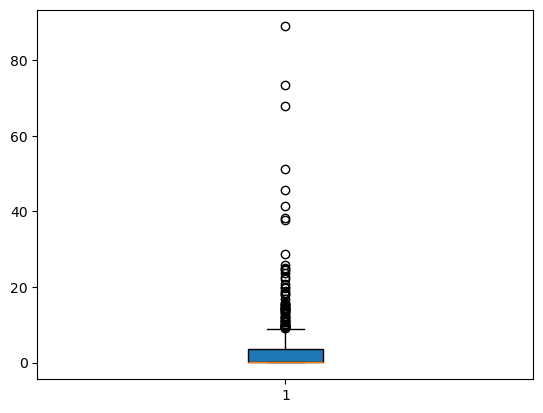

In [13]:
plt.boxplot(data["crime_rate"],patch_artist=True)

In [14]:
print(f"old shape of data {data.shape}")
Q1=data["crime_rate"].quantile(0.25)
Q3=data["crime_rate"].quantile(0.75)
IQR=Q3-Q1
print(Q3,Q1,IQR)
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
lower_index=np.where(data["crime_rate"]<=lower)[0]
upper_index=np.where(data["crime_rate"]>=upper)[0]
data.drop(index=lower_index,inplace=True)
data.drop(index=upper_index,inplace=True)
print(f"new shape of data {data.shape}")

old shape of data (506, 19)
3.6770825 0.08204499999999999 3.5950375
new shape of data (440, 19)


In [15]:
data.reset_index(inplace=True)
data.drop("index",axis=1,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1c5f18c9b90>,
 'caps': [<matplotlib.lines.Line2D at 0x1c5f18cb2d0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1c5f1885290>],
 'medians': [<matplotlib.lines.Line2D at 0x1c5f18b1810>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c5f18e5310>],
 'means': []}

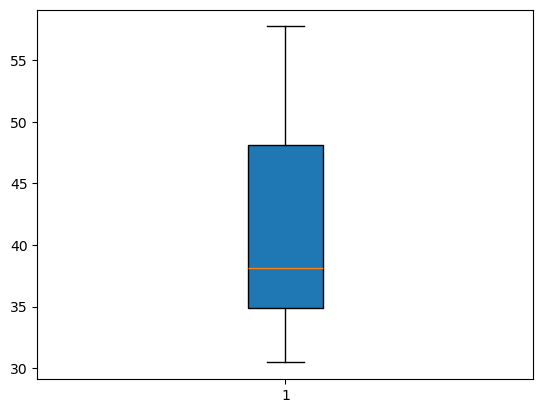

In [16]:
plt.boxplot(data["resid_area"],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1c5f1932ad0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c5f194ce90>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1c5f1846790>],
 'medians': [<matplotlib.lines.Line2D at 0x1c5f194e310>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c5f194ee10>],
 'means': []}

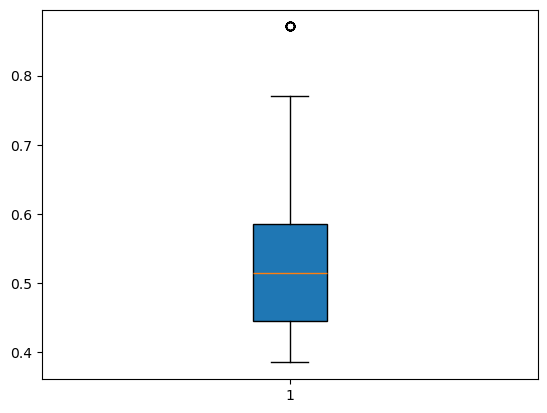

In [17]:
plt.boxplot(data["air_qual"],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1c5f19a2010>,
 'caps': [<matplotlib.lines.Line2D at 0x1c5f19a3910>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1c5f19a1550>],
 'medians': [<matplotlib.lines.Line2D at 0x1c5f19b0f90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c5f19b1990>],
 'means': []}

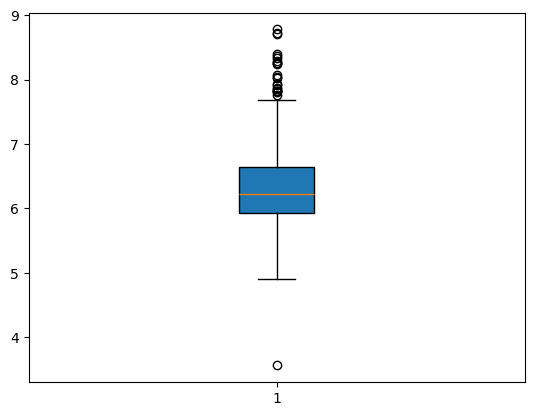

In [18]:
plt.boxplot(data["room_num"],patch_artist=True)

In [19]:
print(f"old shape of data {data.shape}")
Q1=data["room_num"].quantile(0.25)
Q3=data["room_num"].quantile(0.75)
IQR=Q3-Q1
print(Q3,Q1,IQR)
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
lower_index=np.where(data["room_num"]<=lower)[0]
upper_index=np.where(data["room_num"]>=upper)[0]
data.drop(index=lower_index,inplace=True)
data.drop(index=upper_index,inplace=True)
print(f"new shape of data {data.shape}")

old shape of data (440, 19)
6.63675 5.92675 0.71
new shape of data (417, 19)


In [20]:
data.reset_index(inplace=True)
data.drop("index",axis=1,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1c5f19baad0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c5f21067d0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1c5f19de510>],
 'medians': [<matplotlib.lines.Line2D at 0x1c5f2107ad0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c5f2114550>],
 'means': []}

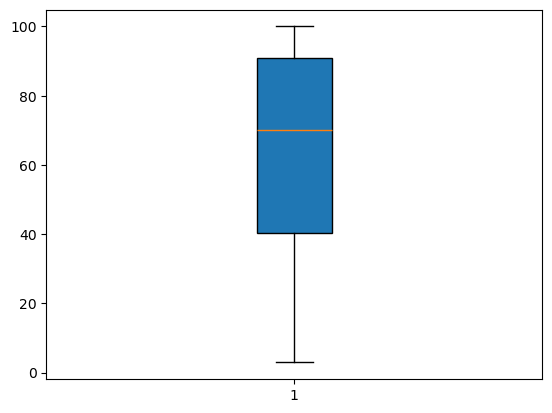

In [21]:
plt.boxplot(data["age"],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1c5f2122050>,
 'caps': [<matplotlib.lines.Line2D at 0x1c5f216f090>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1c5f2136510>],
 'medians': [<matplotlib.lines.Line2D at 0x1c5f2174650>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c5f2175150>],
 'means': []}

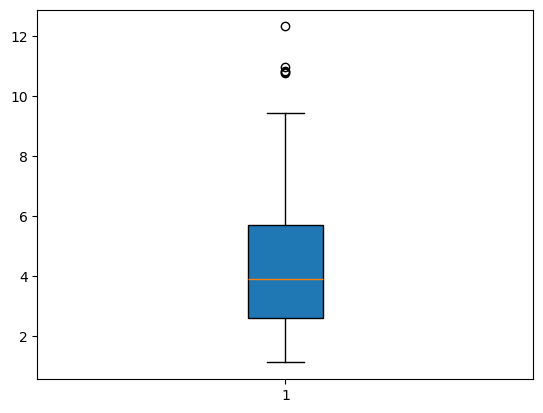

In [22]:
plt.boxplot(data["dist1"],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1c5f31d56d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c5f31d6e90>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1c5f31d4ed0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c5f31dc490>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c5f31dce90>],
 'means': []}

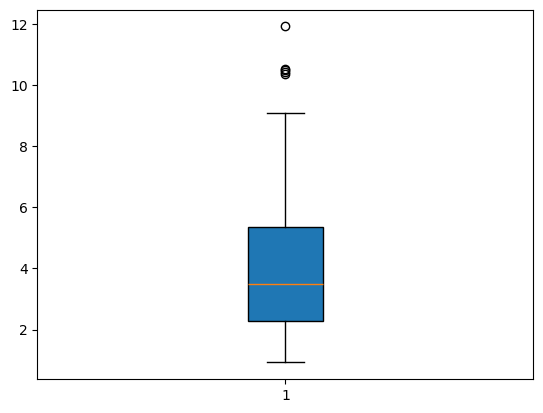

In [23]:
plt.boxplot(data["dist2"],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1c5f31d7810>,
 'caps': [<matplotlib.lines.Line2D at 0x1c5f3232250>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1c5f3230290>],
 'medians': [<matplotlib.lines.Line2D at 0x1c5f32338d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c5f3240390>],
 'means': []}

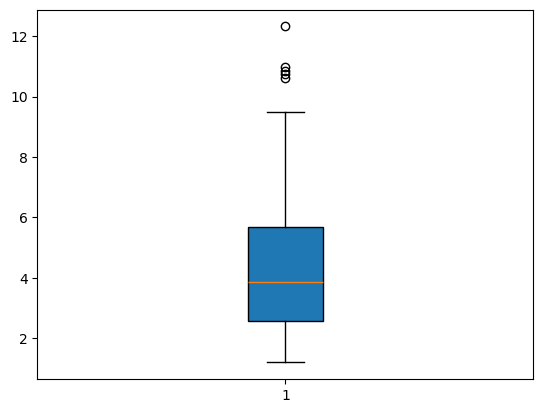

In [24]:
plt.boxplot(data["dist3"],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1c5f32ac8d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c5f32adfd0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1c5f32a3f10>],
 'medians': [<matplotlib.lines.Line2D at 0x1c5f32af4d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c5f32affd0>],
 'means': []}

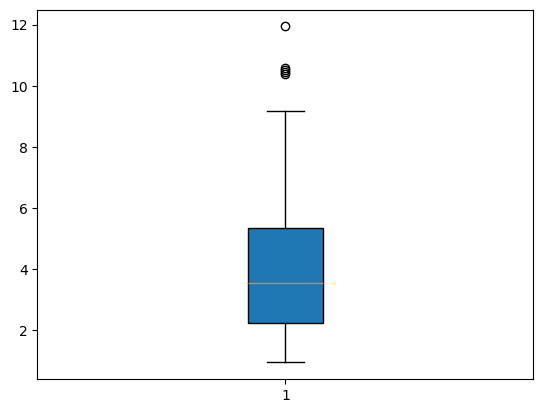

In [25]:
plt.boxplot(data["dist4"],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1c5f213f110>,
 'caps': [<matplotlib.lines.Line2D at 0x1c5f3435690>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1c5f342b610>],
 'medians': [<matplotlib.lines.Line2D at 0x1c5f3436c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c5f3437650>],
 'means': []}

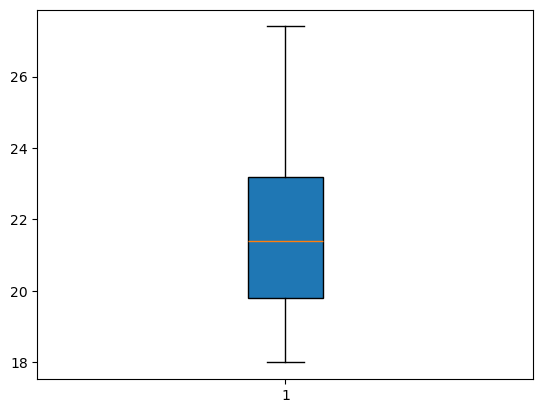

In [26]:
plt.boxplot(data["teachers"],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1c5f3499c10>,
 'caps': [<matplotlib.lines.Line2D at 0x1c5f349b350>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1c5f1816510>],
 'medians': [<matplotlib.lines.Line2D at 0x1c5f34a87d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c5f34a9390>],
 'means': []}

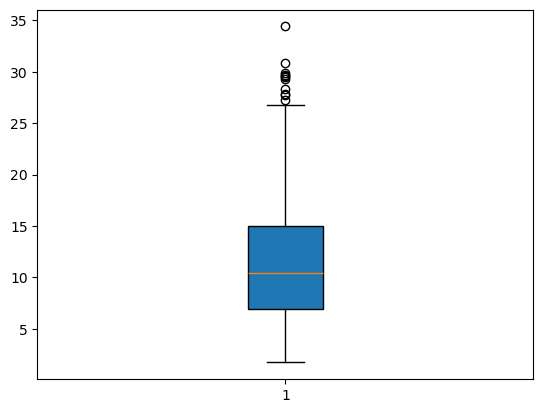

In [27]:
plt.boxplot(data["poor_prop"],patch_artist=True)

In [28]:
data.reset_index(inplace=True)
data.drop("index",axis=1,inplace=True)

In [29]:
print(f"old shape of data {data.shape}")
Q1=data["poor_prop"].quantile(0.25)
Q3=data["poor_prop"].quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
lower_index=np.where(data["poor_prop"]<=lower)[0]
upper_index=np.where(data["poor_prop"]>=upper)[0]
data.drop(index=lower_index,inplace=True)
data.drop(index=upper_index,inplace=True)
print(f"new shape of data {data.shape}")

old shape of data (417, 19)
new shape of data (406, 19)


In [30]:
data.reset_index(inplace=True)
data.drop("index",axis=1,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1c5f3472050>,
 'caps': [<matplotlib.lines.Line2D at 0x1c5f32da590>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1c5f32d8350>],
 'medians': [<matplotlib.lines.Line2D at 0x1c5f32dbad0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c5f32e0550>],
 'means': []}

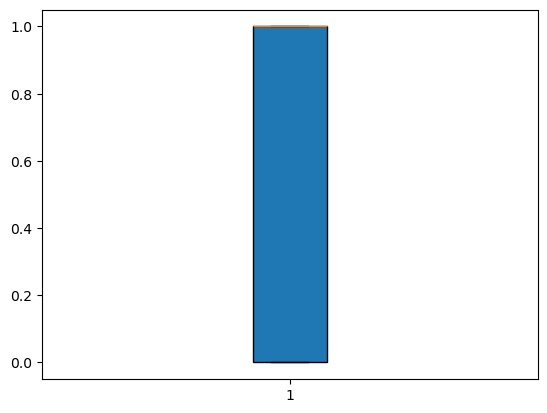

In [31]:
plt.boxplot(data["airport"],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1c5f3334ed0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c5f3336710>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c5f33342d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c5f3337cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c5f3344710>],
 'means': []}

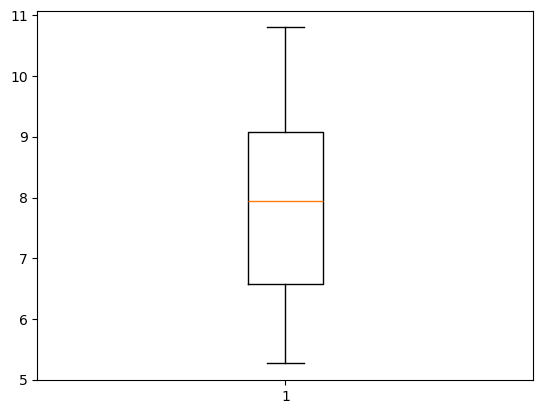

In [32]:
plt.boxplot(data["n_hos_beds"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c5f339f4d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c5f33a8d10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c5f339e890>],
 'medians': [<matplotlib.lines.Line2D at 0x1c5f33aa2d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c5f33aadd0>],
 'means': []}

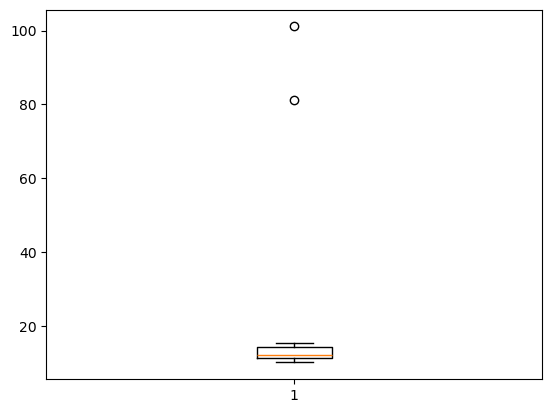

In [33]:
plt.boxplot(data["n_hot_rooms"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c5f35382d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c5f3539a50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c5f352b790>],
 'medians': [<matplotlib.lines.Line2D at 0x1c5f353af50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c5f353ba50>],
 'means': []}

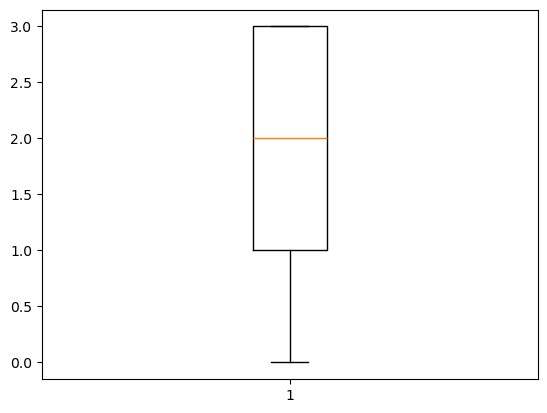

In [34]:
plt.boxplot(data["waterbody"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c5f3590dd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c5f19d6150>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c5f35a1890>],
 'medians': [<matplotlib.lines.Line2D at 0x1c5f35a8c90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c5f35a9650>],
 'means': []}

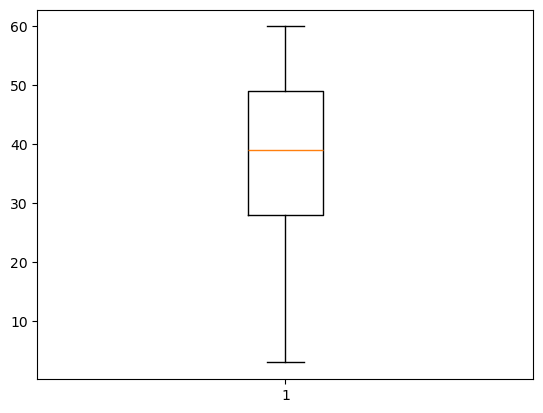

In [35]:
plt.boxplot(data["rainfall"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c5f3608f50>,
 'caps': [<matplotlib.lines.Line2D at 0x1c5f360a6d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c5f36085d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c5f360bd50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c5f3614810>],
 'means': []}

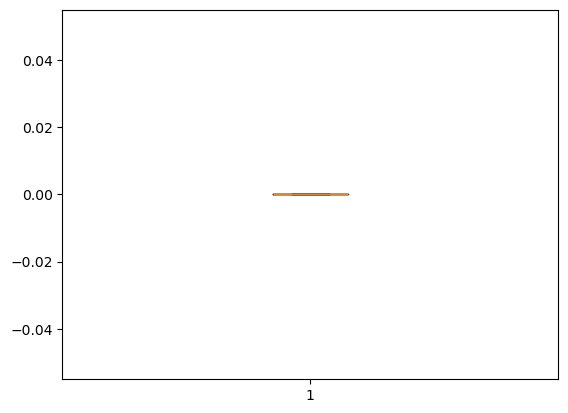

In [36]:
plt.boxplot(data["bus_ter"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c5f36666d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c5f3667e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c5f3665cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c5f3669310>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c5f3669d90>],
 'means': []}

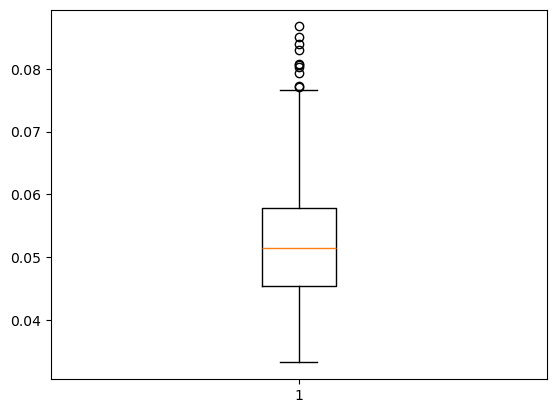

In [37]:
plt.boxplot(data["parks"])

In [38]:
print(f"old shape of data {data.shape}")
Q1=data["parks"].quantile(0.25)
Q3=data["parks"].quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
lower_index=np.where(data["parks"]<=lower)[0]
upper_index=np.where(data["parks"]>=upper)[0]
data.drop(index=lower_index,inplace=True)
data.drop(index=upper_index,inplace=True)
print(f"new shape of data {data.shape}")

old shape of data (406, 19)
new shape of data (396, 19)


In [39]:
data.reset_index(inplace=True)
data.drop("index",axis=1,inplace=True)

In [40]:
x=data.drop("price",axis=1)
y=data["price"]

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [52]:
model1=LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [53]:
model1.coef_

array([ 1.90508832e-01, -5.31094099e-02, -1.34442357e+01,  4.52539836e+00,
        3.75572216e-03, -9.42416400e-01, -6.35213360e-02,  2.73619030e-01,
       -1.47728770e-01,  6.19247359e-01, -7.02135810e-01,  6.81104236e-01,
        3.45609297e-01,  1.56598865e-02,  4.10727023e-02,  1.87017397e-02,
        0.00000000e+00,  5.04180370e+01])

In [54]:
model1.intercept_

-5.040793695854251

In [55]:
model1.score(x_train,y_train)

0.6946884667488936

In [56]:
model1.score(x_test,y_test)

0.659257620998544

In [57]:
y_pred=model1.predict(x_test)

In [48]:
pd.DataFrame({"TrueValues":y_test,"Predicted Values":y_pred})

,TrueValues,Predicted Values
133,17.8,16.033910
376,21.2,21.615709
167,33.0,31.093397
276,23.8,27.832497
239,32.0,32.689486
...,...,...
155,23.2,26.071682
74,20.8,23.673145
356,16.4,19.058790
216,24.5,22.749681


In [49]:
mean_absolute_error(y_test,y_pred)

2.585490853325561

In [50]:
mean_squared_error(y_test,y_pred)

10.298003840481048